In [69]:
import pandas as pd
import numpy as np

# библиотека для построения графиков
import seaborn as sns
# библиотека с упрощенными графиками
import matplotlib.pyplot as plot

In [70]:
df = pd.read_csv('vgsales_17.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,8861,NHL 09,PS2,2008.0,Sports,Electronic Arts,0.07,0.06,0.00,0.02,0.15
1,16363,Shirahana no Ori: Hiiro no Kakera 4 - Shiki no...,PSP,2013.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
2,3476,Gex: Enter the Gecko,PS,1998.0,Platform,BMG Interactive Entertainment,0.32,0.22,0.00,0.04,0.58
3,7432,Deus Ex: The Conspiracy,PS2,2002.0,Action,Eidos Interactive,0.10,0.08,0.00,0.03,0.21
4,501,Call of Duty: Finest Hour,PS2,2004.0,Shooter,Activision,1.51,1.12,0.01,0.24,2.89
...,...,...,...,...,...,...,...,...,...,...,...
548,5776,Jampack Volume 12,PS2,2005.0,Misc,Sony Computer Entertainment,0.15,0.12,0.00,0.04,0.31
549,662,Bloodborne,PS4,2015.0,Action,Sony Computer Entertainment,1.00,0.76,0.26,0.36,2.38
550,7811,IHRA Professional Drag Racing 2005,PS2,2004.0,Racing,Bethesda Softworks,0.09,0.07,0.00,0.02,0.19
551,2032,Shrek 2,GC,2004.0,Platform,Activision,0.73,0.26,0.01,0.03,1.02


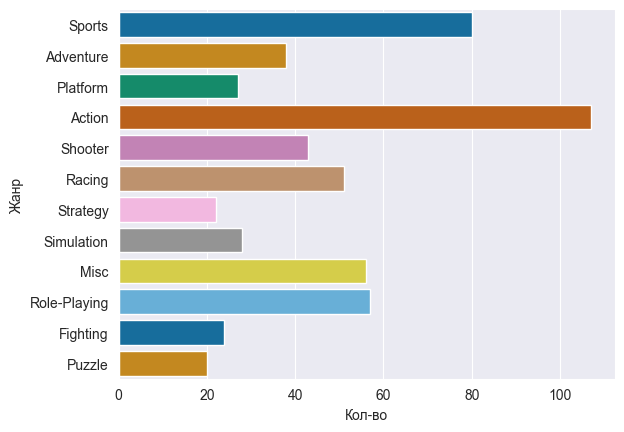

In [71]:
#- Продемонстрировать график количества значений категориального атрибута (countplot);

sns.set_style('darkgrid')
sns.countplot(y='Genre',data=df,palette='colorblind')
plot.xlabel('Кол-во')
plot.ylabel('Жанр')
plot.show()

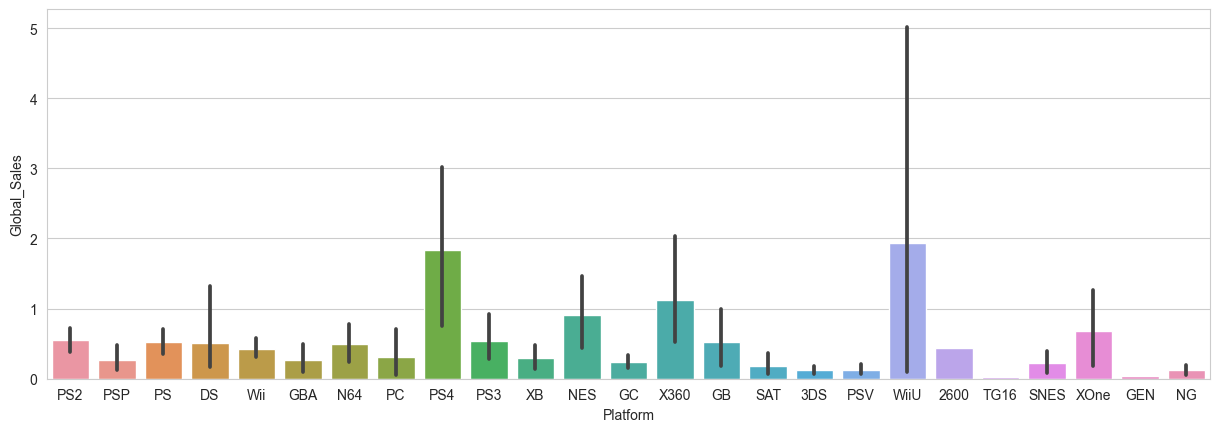

In [72]:
#- Отобразить среднее значение атрибутов (barplot);
sns.set_style('whitegrid')
graph = sns.barplot(x=df["Platform"], y=df["Global_Sales"])
graph.figure.set_figwidth(15)

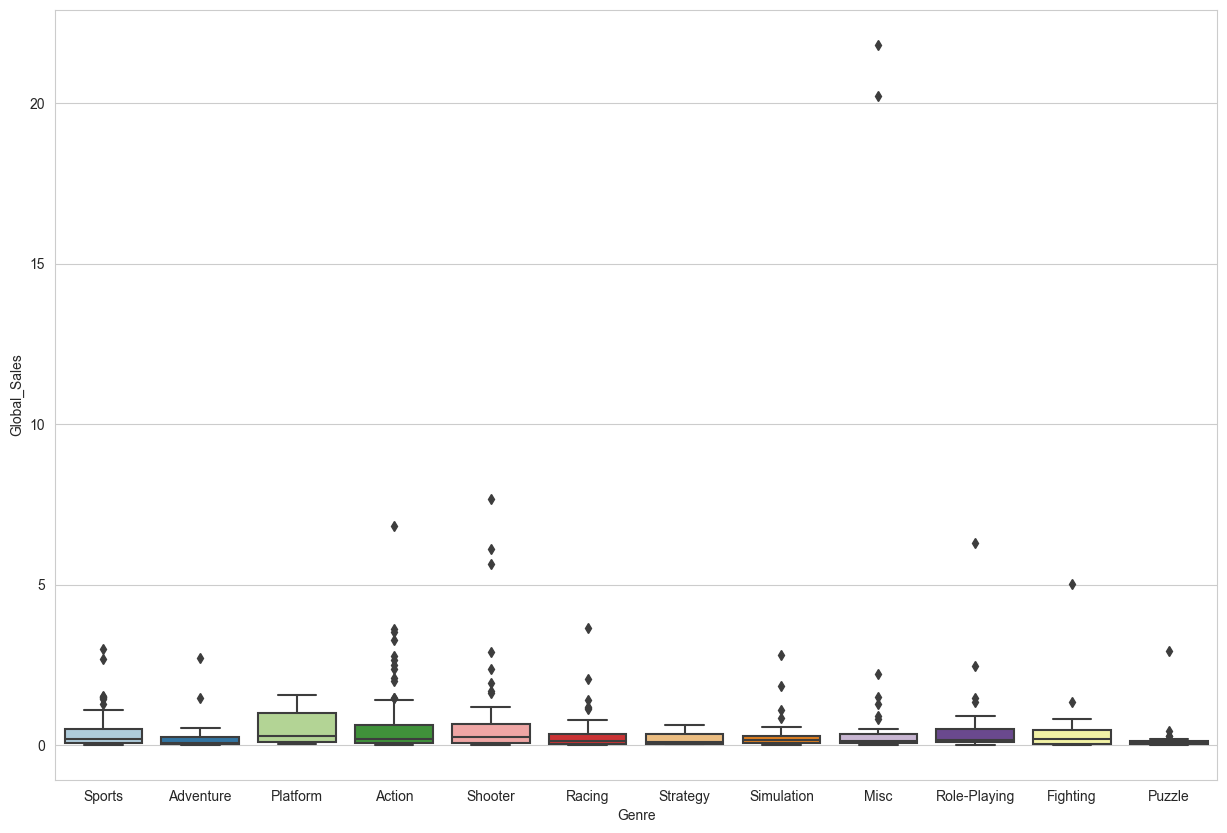

In [73]:
#- Реализовать ящик с усами (boxplot);
graph = sns.boxplot(x="Genre", y="Global_Sales",data = df,palette='Paired')
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10) 

C:\Users\olp20\AppData\Local\Temp\ipykernel_20116\4149197074.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  HeatMap = sns.heatmap(df.corr(), vmin=-1, vmax=1)


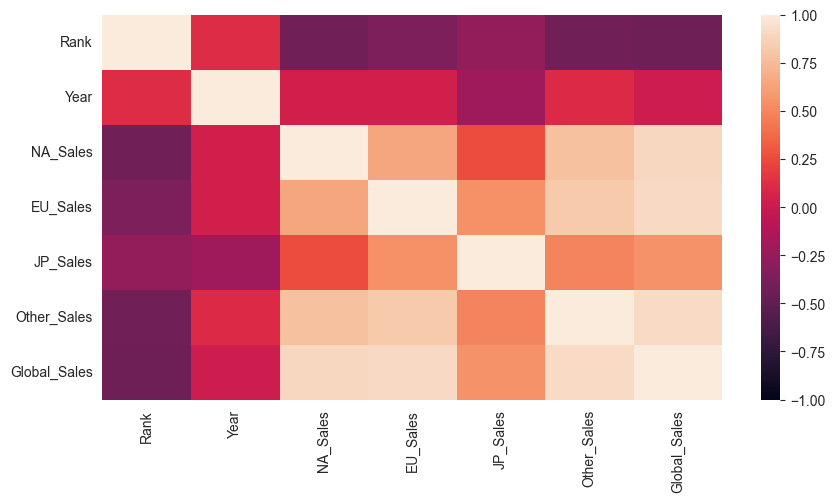

In [74]:
#- Сделать тепловую карту корреляции (heatmap);
HeatMap = sns.heatmap(df.corr(), vmin=-1, vmax=1)
HeatMap.figure.set_figwidth(10)
HeatMap.figure.set_figheight(5) 

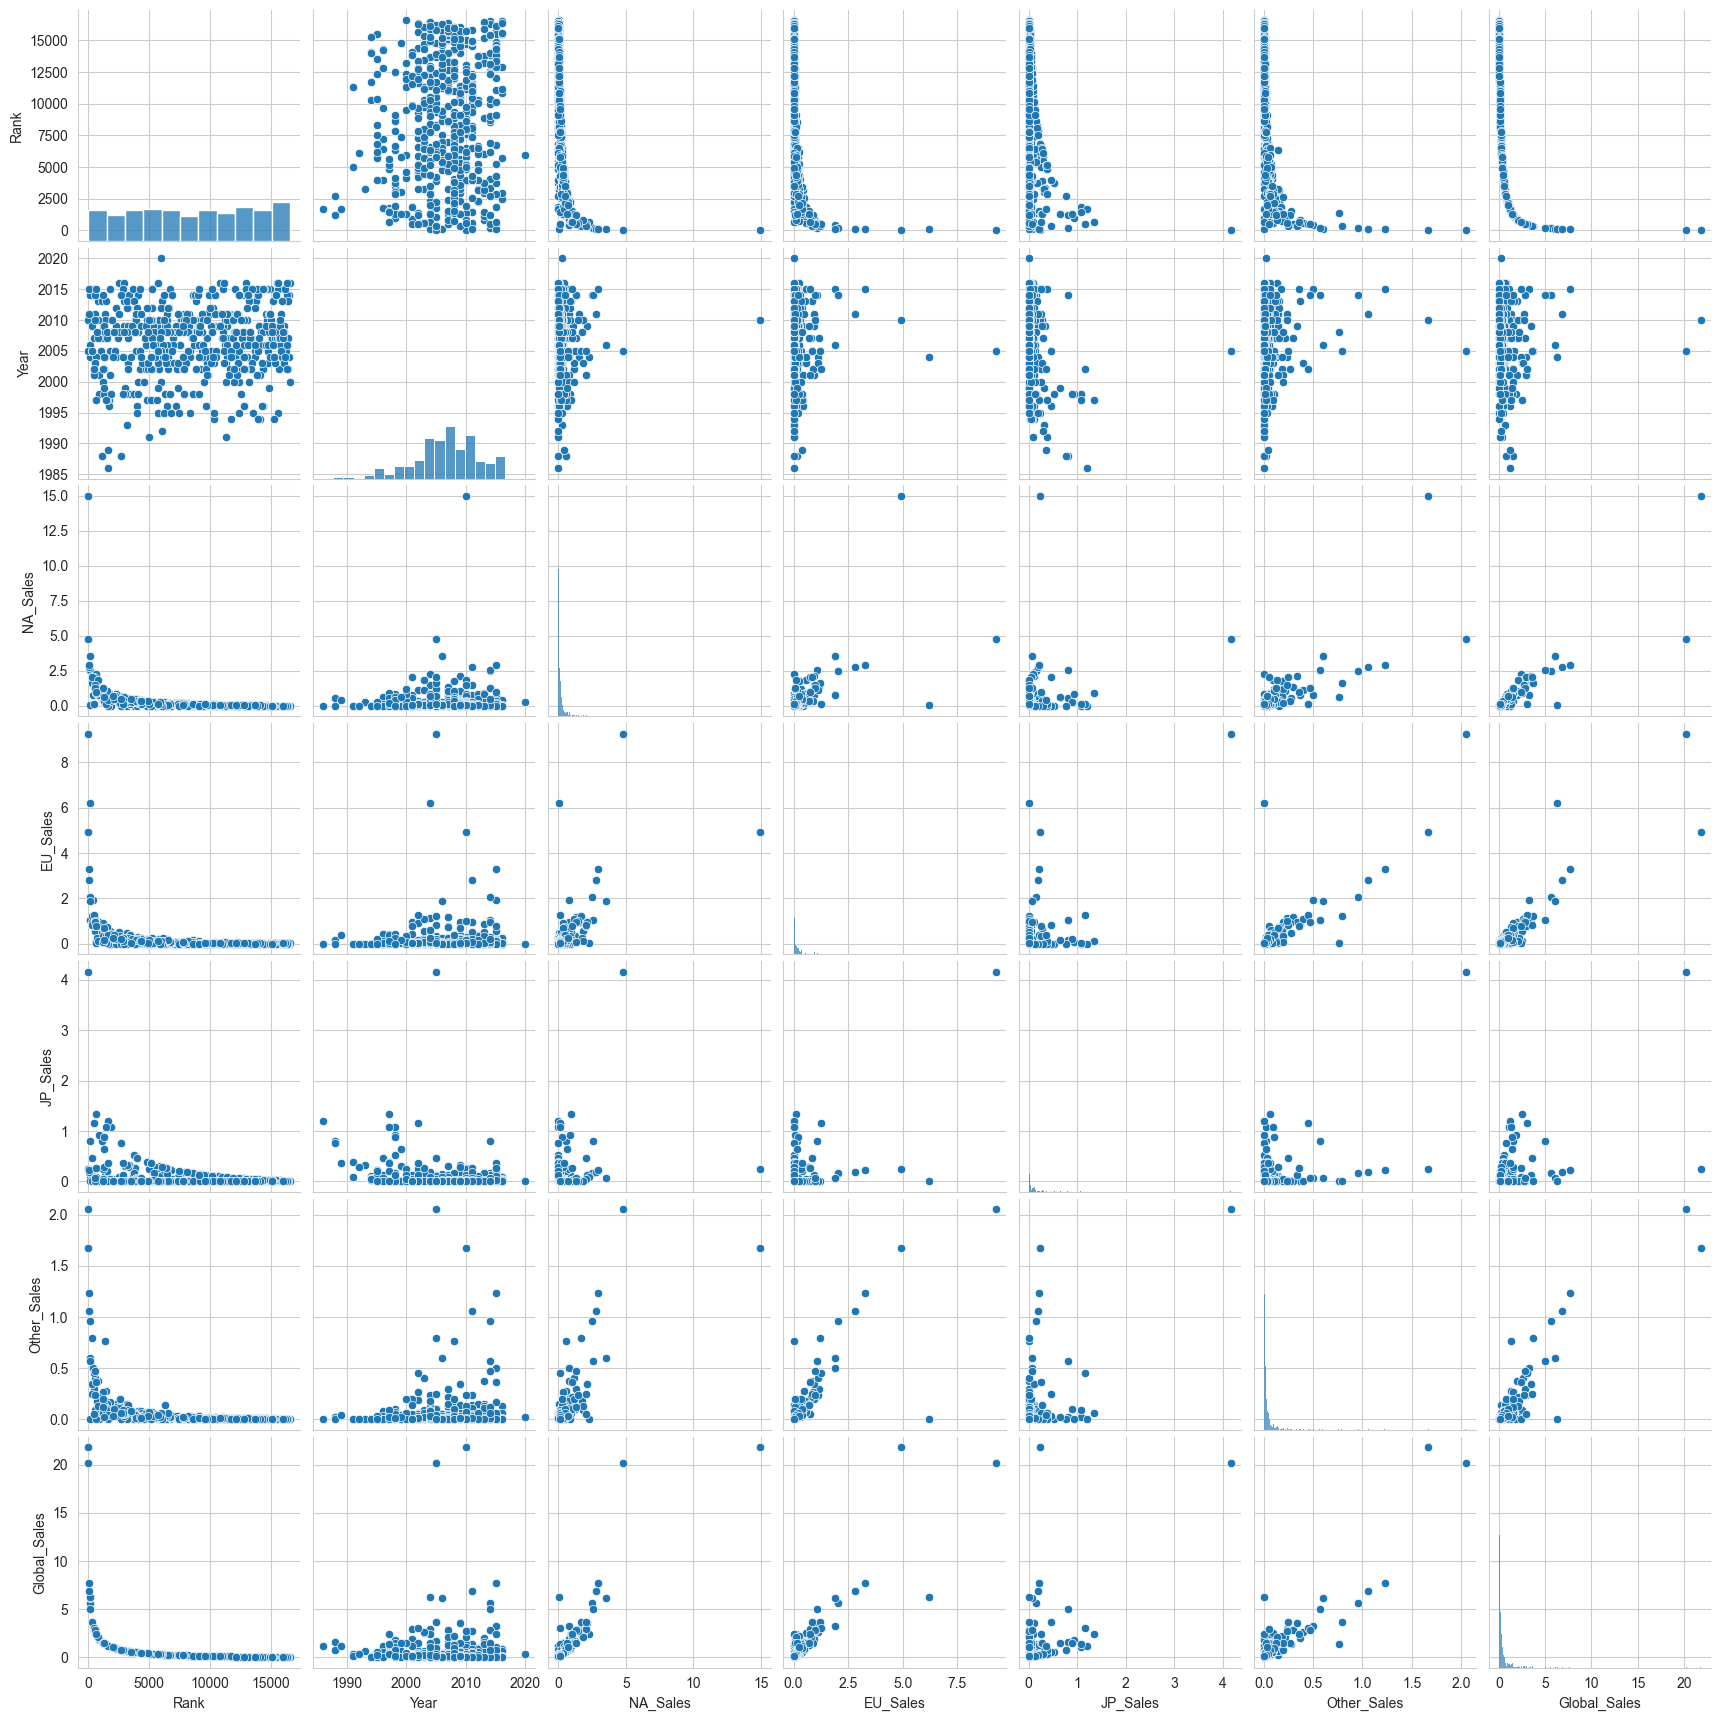

In [75]:
#- Показать соотношение между атрибутами (piarplot);
pair = sns.pairplot(df)

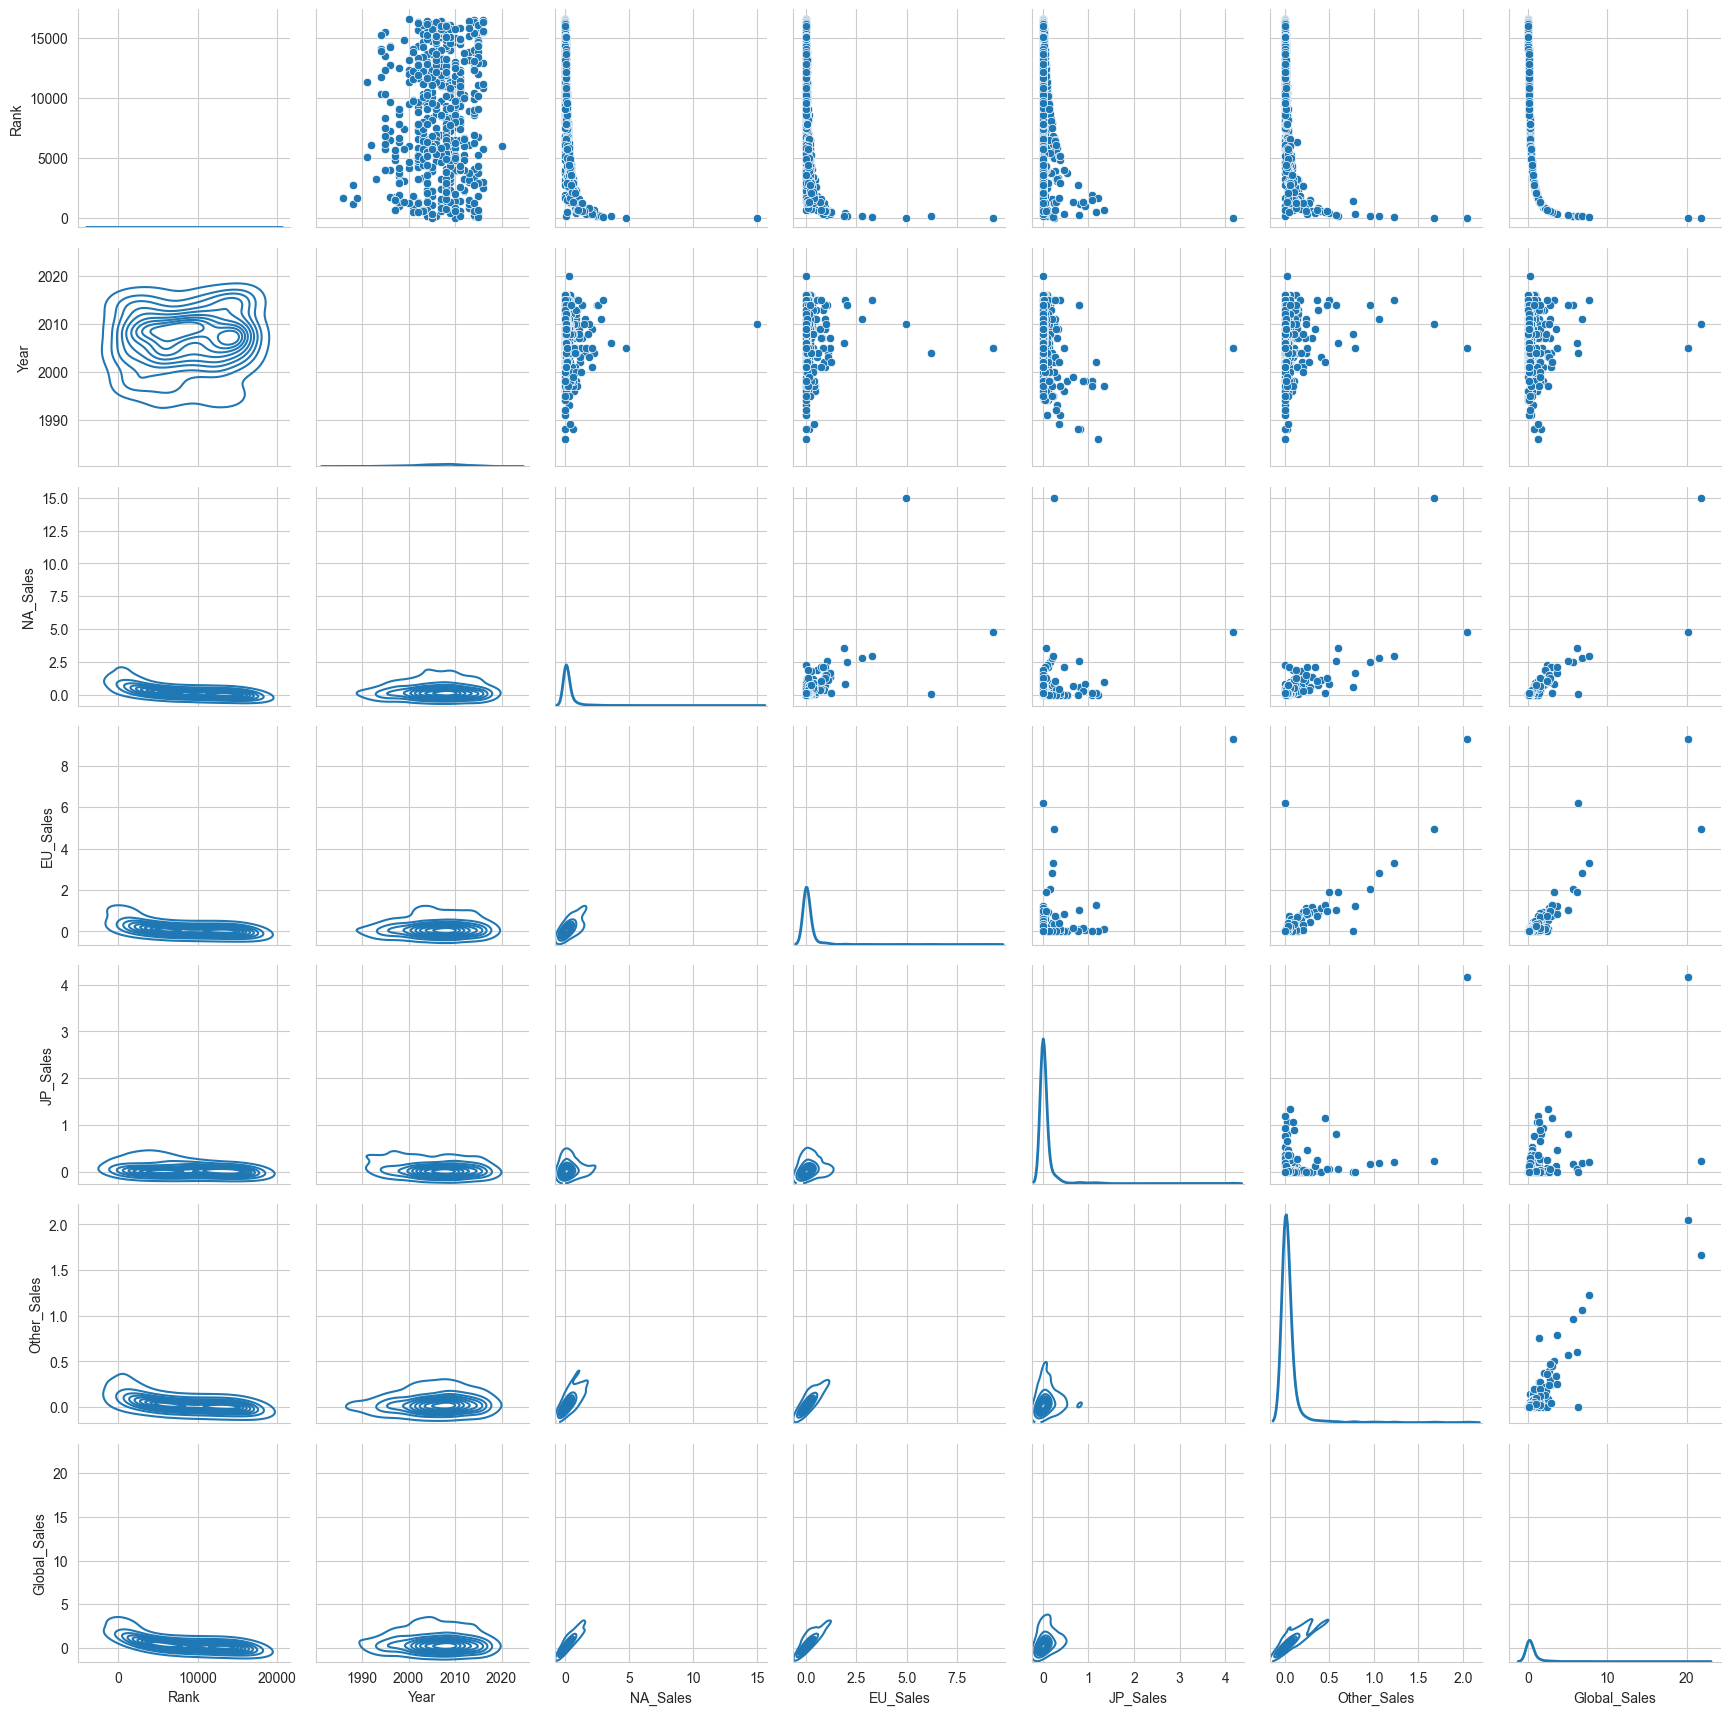

In [76]:
#- Показать соотношение между атрибутами (pairgrid);
pair_grid = sns.PairGrid(df)
pair_grid.map_upper(sns.scatterplot)
pair_grid.map_lower(sns.kdeplot)
pair_grid.map_diag(sns.kdeplot, lw = 2)

In [77]:
#- Провести кластеризацию через Kmeans, предоставить результаты и их описать.
df_mini = df[["Rank", "Year", "Other_Sales"]][::100]
df_mini

,Rank,Year,Other_Sales
0,8861,2008.0,0.02
100,14030,2009.0,0.01
200,14095,1994.0,0.00
300,9317,2004.0,0.00
400,3956,2011.0,0.04
500,10502,2004.0,0.00


In [78]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(df_mini)
all_predictions = model.predict(df_mini)
df_mini["KMeans"] = all_predictions
df_mini

c:\Users\olp20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Rank,Year,Other_Sales,KMeans
0,8861,2008.0,0.02,0
100,14030,2009.0,0.01,1
200,14095,1994.0,0.00,1
300,9317,2004.0,0.00,0
400,3956,2011.0,0.04,2
500,10502,2004.0,0.00,0


<Axes: xlabel='count', ylabel='KMeans'>

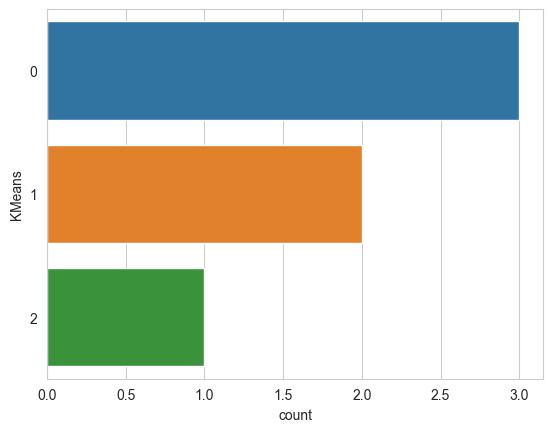

In [79]:
sns.countplot(data = df_mini, y = "KMeans")

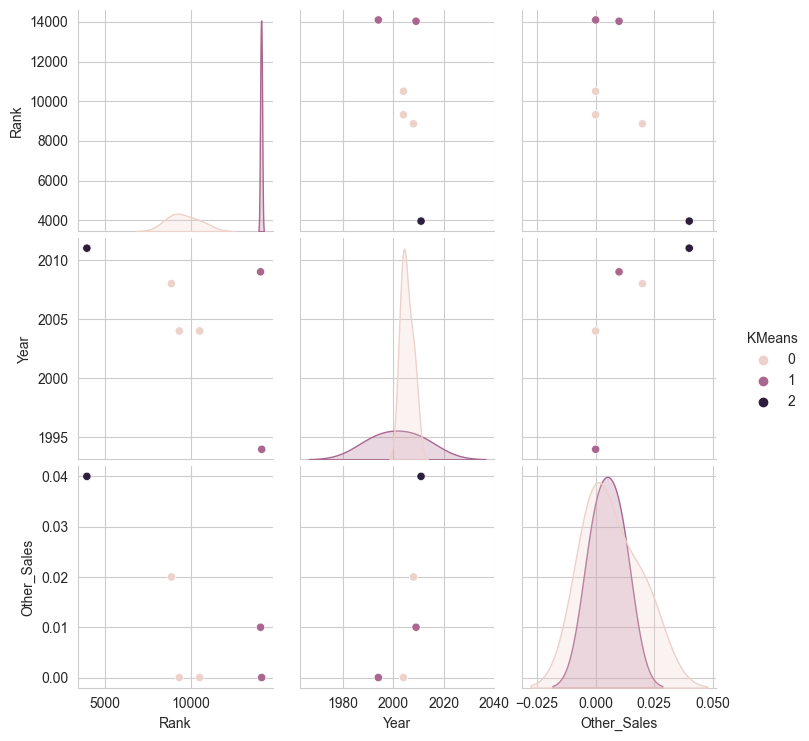

In [80]:
sns.pairplot(df_mini,hue="KMeans")